In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [16]:
df = pd.read_csv('data/housing.csv')

In [107]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [18]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [19]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
df[['median_house_value', 'longitude']].corr()

,median_house_value,longitude
median_house_value,1.000000,-0.045398
longitude,-0.045398,1.000000


<Figure size 1800x1000 with 0 Axes>

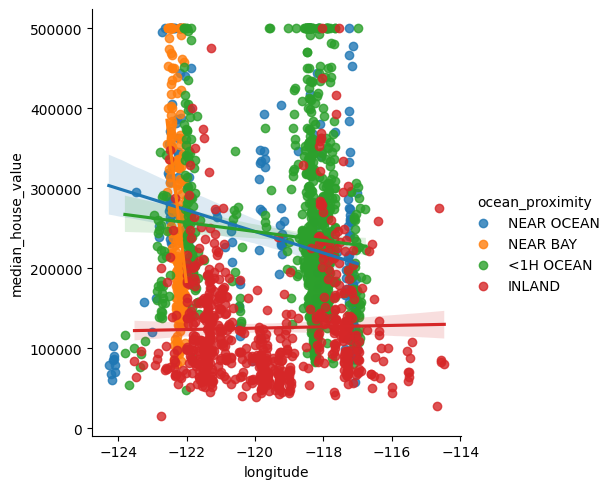

In [ ]:
plt.figure(figsize=(18, 10))
sns.lmplot(x='longitude', y='median_house_value', hue='ocean_proximity', data=df.sample(2000))

In [29]:
# dropping both lat and long as the coast of california is slanted, so no one column will give accurate result, a combination ()which will require some work to figure out) is needed.

prices = df.drop(columns=['latitude', 'longitude']).copy(deep=True)

In [30]:
prices

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...
20428,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20429,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20430,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20431,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [31]:
# now instead of total rooms and total bedrooms, what will give a better idea is -> avg rooms per household in the building and avg bedroom

prices['avg_bedrooms'] = prices['total_bedrooms']/prices['households']
prices['avg_rooms'] = prices['total_rooms']/prices['households']

In [32]:
prices[['avg_rooms','median_house_value']].corr()

,avg_rooms,median_house_value
avg_rooms,1.000000,0.151344
median_house_value,0.151344,1.000000


In [33]:
prices[['total_rooms','median_house_value']].corr()

,total_rooms,median_house_value
total_rooms,1.000000,0.133294
median_house_value,0.133294,1.000000


<Axes: xlabel='avg_rooms', ylabel='Count'>

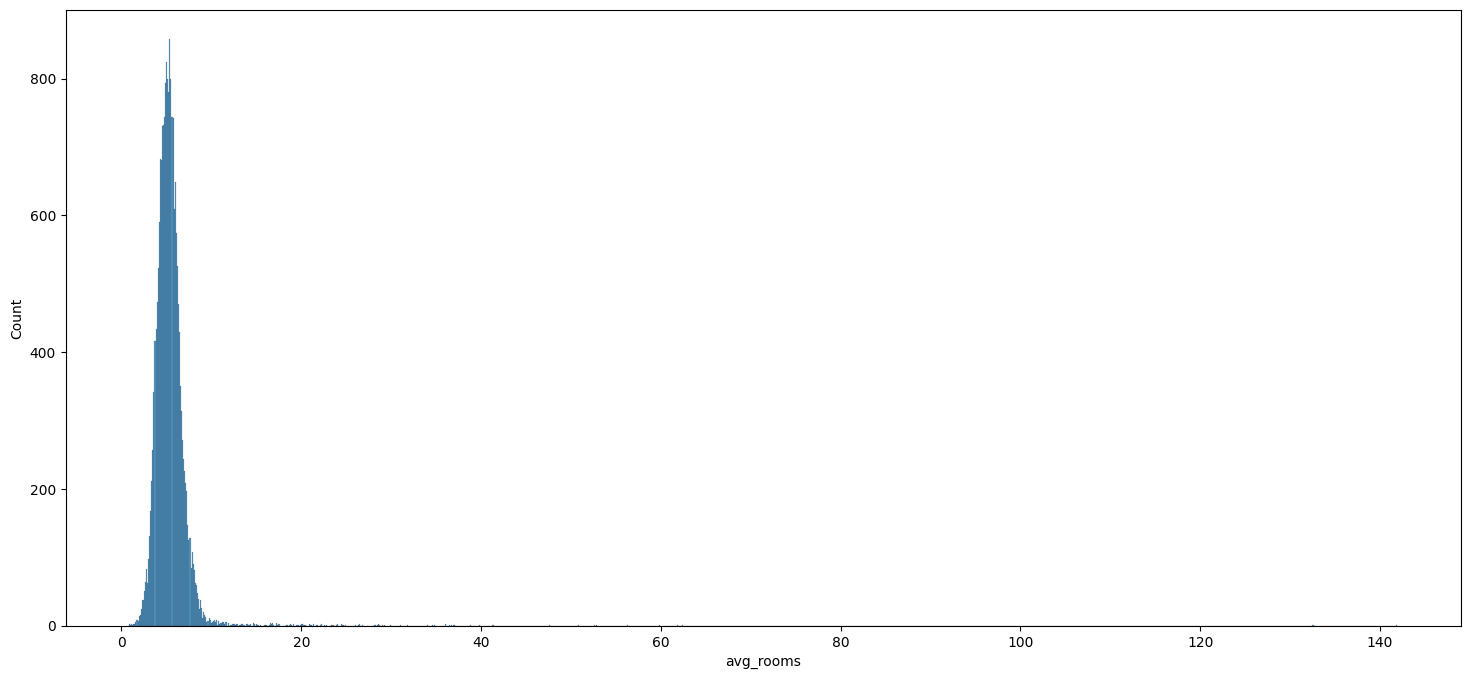

In [34]:
plt.figure(figsize=(18, 8))
sns.histplot(data=prices, x='avg_rooms')

In [39]:
# we can see we have some outliers here, an average of 140 rooms per hosuehold sounds horribly wrong, lets investigate

prices[prices['avg_rooms'] > 50]

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_bedrooms,avg_rooms
1901,16.0,1463.0,264.0,54.0,26.0,4.9750,20.6300,INLAND,10.153846,56.269231
1902,19.0,2967.0,528.0,112.0,48.0,4.0714,43.7500,INLAND,11.000000,61.812500
1903,33.0,1561.0,282.0,30.0,11.0,1.8750,50.0001,INLAND,25.636364,141.909091
1968,34.0,1988.0,511.0,36.0,15.0,4.6250,16.2500,INLAND,34.066667,132.533333
2378,23.0,1881.0,380.0,64.0,37.0,3.8750,12.5000,INLAND,10.270270,50.837838
9581,14.0,5919.0,1278.0,265.0,112.0,3.2431,22.1400,INLAND,11.410714,52.848214
11591,22.0,2213.0,372.0,98.0,42.0,1.1912,17.0000,INLAND,8.857143,52.690476
11745,25.0,958.0,245.0,28.0,16.0,2.6250,6.7500,INLAND,15.312500,59.875000
12328,17.0,2809.0,635.0,83.0,45.0,1.6154,8.7500,INLAND,14.111111,62.422222


In [ ]:
prices['median_house_value'] *= 10000

In [40]:
prices[['housing_median_age','median_house_value']].corr()

,housing_median_age,median_house_value
housing_median_age,1.000000,0.106432
median_house_value,0.106432,1.000000


In [ ]:
prices.drop(index=[])

<Axes: xlabel='housing_median_age', ylabel='median_house_value'>

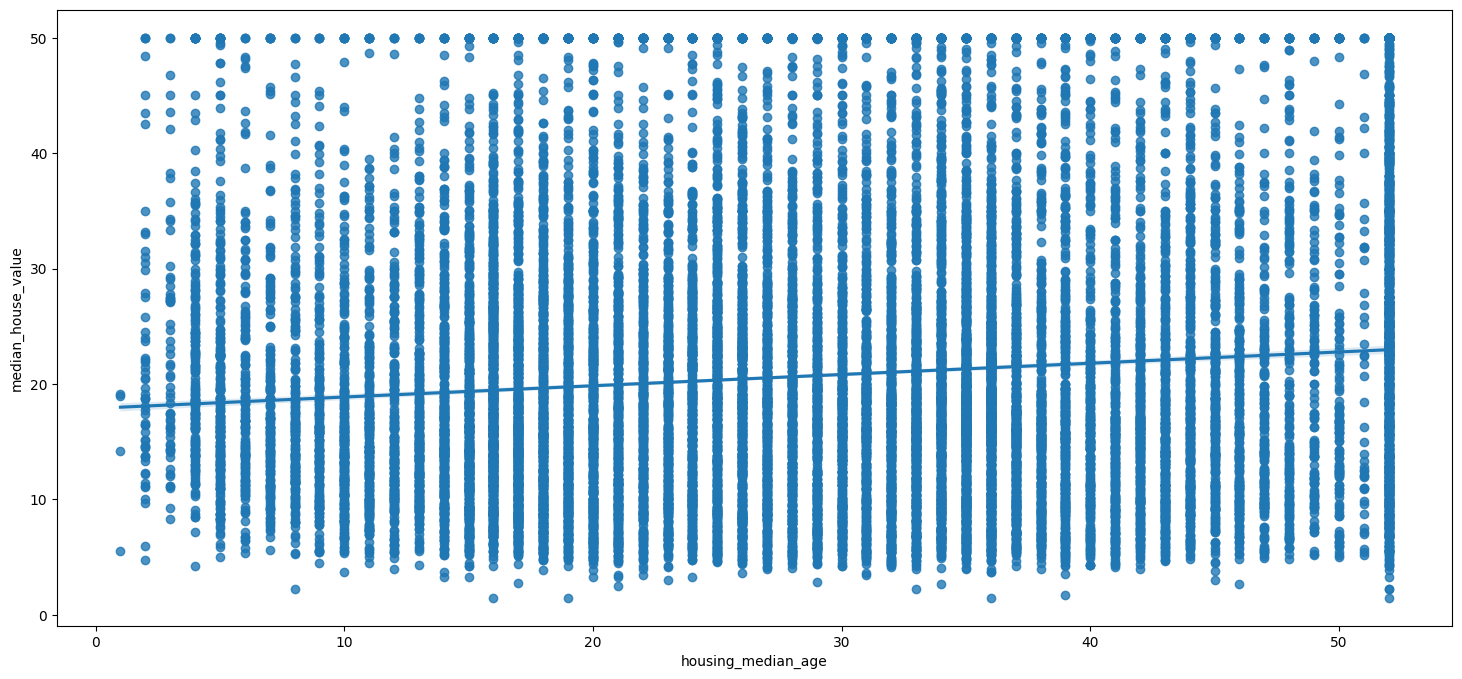

In [44]:
plt.figure(figsize=(18, 8))
sns.regplot(data=prices, x='housing_median_age', y='median_house_value')

In [50]:
prices = prices.drop(columns='housing_median_age')

In [51]:
prices

,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_bedrooms,avg_rooms
0,880.0,129.0,322.0,126.0,8.3252,45.26,NEAR BAY,1.023810,6.984127
1,7099.0,1106.0,2401.0,1138.0,8.3014,35.85,NEAR BAY,0.971880,6.238137
2,1467.0,190.0,496.0,177.0,7.2574,35.21,NEAR BAY,1.073446,8.288136
3,1274.0,235.0,558.0,219.0,5.6431,34.13,NEAR BAY,1.073059,5.817352
4,1627.0,280.0,565.0,259.0,3.8462,34.22,NEAR BAY,1.081081,6.281853
...,...,...,...,...,...,...,...,...,...
20428,1665.0,374.0,845.0,330.0,1.5603,7.81,INLAND,1.133333,5.045455
20429,697.0,150.0,356.0,114.0,2.5568,7.71,INLAND,1.315789,6.114035
20430,2254.0,485.0,1007.0,433.0,1.7000,9.23,INLAND,1.120092,5.205543
20431,1860.0,409.0,741.0,349.0,1.8672,8.47,INLAND,1.171920,5.329513


In [52]:
prices[['median_income', 'median_house_value']].corr()

,median_income,median_house_value
median_income,1.000000,0.688355
median_house_value,0.688355,1.000000


<Axes: xlabel='median_income', ylabel='median_house_value'>

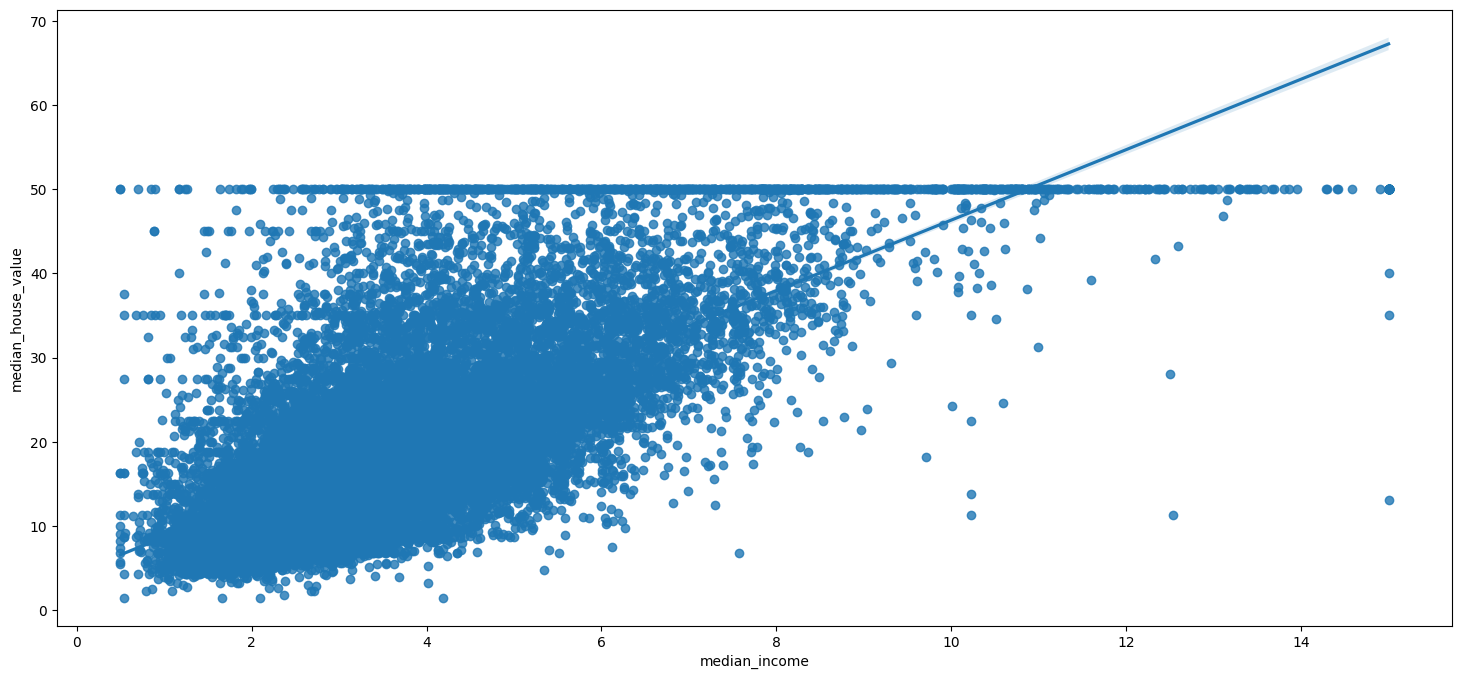

In [53]:
plt.figure(figsize=(18, 8))
sns.regplot(data=prices, x='median_income', y='median_house_value')

In [57]:
# in many plots of median_house_value with others i can see a horizontal line of markers at 50.0001, i am afraid due to some data error, all values above this got squished to this, should i remove them?

prices[prices['median_house_value'] > 49]['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     562
NEAR OCEAN    227
NEAR BAY      207
INLAND         28
Name: count, dtype: int64

In [58]:
prices['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [59]:
(prices[prices['median_house_value'] > 49]['ocean_proximity'].value_counts())/(prices['ocean_proximity'].value_counts())

ocean_proximity
<1H OCEAN     0.062209
INLAND        0.004310
ISLAND             NaN
NEAR BAY      0.091189
NEAR OCEAN    0.086377
Name: count, dtype: float64

In [62]:
prices[prices['median_house_value'] > 49].drop(columns='ocean_proximity').corr()

,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_bedrooms,avg_rooms
total_rooms,1.000000,0.879825,0.951435,0.892348,0.087116,-0.010117,-0.015489,0.015996
total_bedrooms,0.879825,1.000000,0.891583,0.992783,-0.212420,-0.021276,0.002989,-0.108597
population,0.951435,0.891583,1.000000,0.912997,-0.011006,-0.029048,-0.045453,-0.051548
households,0.892348,0.992783,0.912997,1.000000,-0.185399,-0.025750,-0.032986,-0.128965
median_income,0.087116,-0.212420,-0.011006,-0.185399,1.000000,0.069674,-0.095385,0.222170
median_house_value,-0.010117,-0.021276,-0.029048,-0.025750,0.069674,1.000000,0.004622,0.016704
avg_bedrooms,-0.015489,0.002989,-0.045453,-0.032986,-0.095385,0.004622,1.000000,0.923546
avg_rooms,0.015996,-0.108597,-0.051548,-0.128965,0.222170,0.016704,0.923546,1.000000


In [63]:
prices.drop(columns='ocean_proximity').corr()

,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_bedrooms,avg_rooms
total_rooms,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.029373,0.133482
total_bedrooms,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.045887,0.001538
population,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.066510,-0.071898
households,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.055158,-0.080165
median_income,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.062299,0.325307
median_house_value,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,-0.046739,0.151344
avg_bedrooms,0.029373,0.045887,-0.066510,-0.055158,-0.062299,-0.046739,1.000000,0.848616
avg_rooms,0.133482,0.001538,-0.071898,-0.080165,0.325307,0.151344,0.848616,1.000000


In [64]:
prices[prices['median_house_value'] > 49].index

Index([   89,   457,   491,   492,   507,   508,   509,   510,   512,   515,
       ...
       20122, 20131, 20163, 20175, 20184, 20217, 20221, 20222, 20231, 20238],
      dtype='int64', length=1024)

In [65]:
# as we can see those 1024 rows are badly correlated anyways, so we can drop them

prices = prices.drop(index=prices[prices['median_house_value'] > 49].index)

In [66]:
prices.reset_index(drop=True, inplace=True)

In [67]:
prices

,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_bedrooms,avg_rooms
0,880.0,129.0,322.0,126.0,8.3252,45.26,NEAR BAY,1.023810,6.984127
1,7099.0,1106.0,2401.0,1138.0,8.3014,35.85,NEAR BAY,0.971880,6.238137
2,1467.0,190.0,496.0,177.0,7.2574,35.21,NEAR BAY,1.073446,8.288136
3,1274.0,235.0,558.0,219.0,5.6431,34.13,NEAR BAY,1.073059,5.817352
4,1627.0,280.0,565.0,259.0,3.8462,34.22,NEAR BAY,1.081081,6.281853
...,...,...,...,...,...,...,...,...,...
19404,1665.0,374.0,845.0,330.0,1.5603,7.81,INLAND,1.133333,5.045455
19405,697.0,150.0,356.0,114.0,2.5568,7.71,INLAND,1.315789,6.114035
19406,2254.0,485.0,1007.0,433.0,1.7000,9.23,INLAND,1.120092,5.205543
19407,1860.0,409.0,741.0,349.0,1.8672,8.47,INLAND,1.171920,5.329513


<Axes: xlabel='median_income', ylabel='median_house_value'>

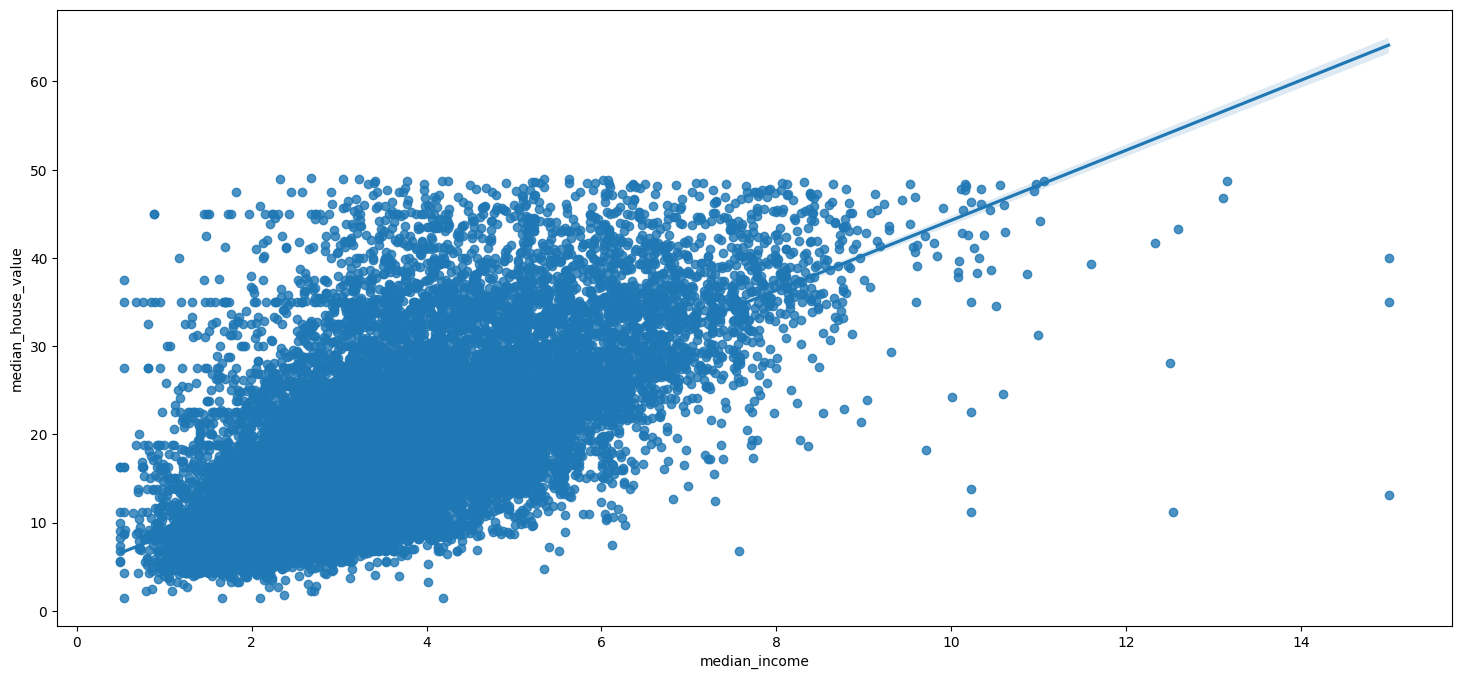

In [68]:
plt.figure(figsize=(18, 8))
sns.regplot(data=prices, x='median_income', y='median_house_value')

<Axes: xlabel='avg_rooms', ylabel='median_house_value'>

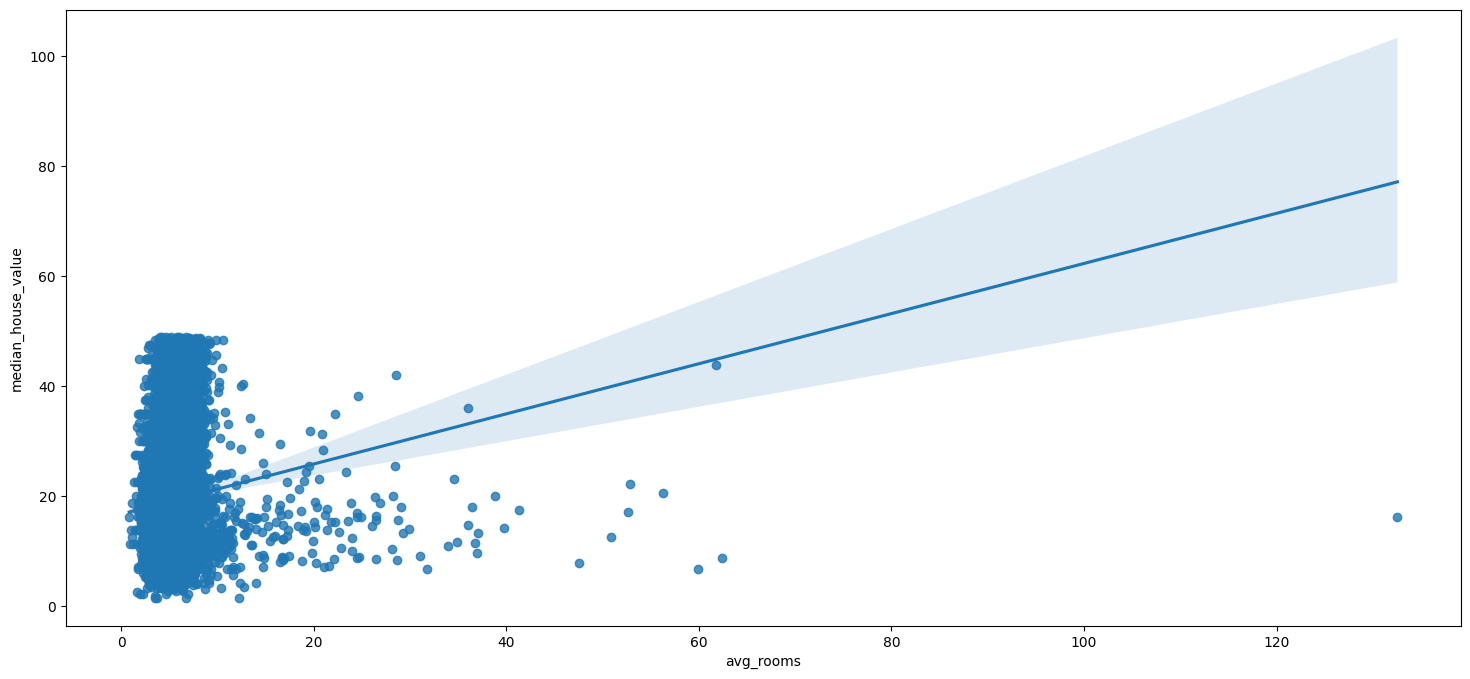

In [69]:
plt.figure(figsize=(18, 8))
sns.regplot(data=prices, x='avg_rooms', y='median_house_value')

In [78]:
prices[prices['avg_rooms'] > 8]

,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_bedrooms,avg_rooms
2,1467.0,190.0,496.0,177.0,7.2574,35.21,NEAR BAY,1.073446,8.288136
130,1617.0,210.0,533.0,194.0,11.6017,39.26,NEAR BAY,1.082474,8.335052
154,2315.0,292.0,861.0,258.0,8.8793,41.03,NEAR BAY,1.131783,8.972868
358,1809.0,261.0,808.0,219.0,6.8600,25.00,NEAR BAY,1.191781,8.260274
362,414.0,54.0,137.0,50.0,4.9750,31.11,NEAR BAY,1.080000,8.280000
...,...,...,...,...,...,...,...,...,...
19201,8803.0,1114.0,3385.0,1010.0,8.7288,42.58,<1H OCEAN,1.102970,8.715842
19210,1986.0,249.0,761.0,241.0,7.2137,40.19,<1H OCEAN,1.033195,8.240664
19232,2786.0,342.0,1114.0,322.0,5.8578,26.63,<1H OCEAN,1.062112,8.652174
19233,3495.0,449.0,1629.0,428.0,5.8096,26.44,<1H OCEAN,1.049065,8.165888


In [79]:
prices[prices['avg_rooms'] > 8].drop(columns='ocean_proximity').corr()

,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_bedrooms,avg_rooms
total_rooms,1.000000,0.954482,0.796671,0.930578,0.065796,0.105787,-0.071831,-0.043693
total_bedrooms,0.954482,1.000000,0.668179,0.842668,-0.120914,-0.078367,0.026142,0.015714
population,0.796671,0.668179,1.000000,0.895746,0.258580,0.292623,-0.285602,-0.266824
households,0.930578,0.842668,0.895746,1.000000,0.179089,0.215470,-0.259060,-0.252910
median_income,0.065796,-0.120914,0.258580,0.179089,1.000000,0.810350,-0.362258,-0.250150
median_house_value,0.105787,-0.078367,0.292623,0.215470,0.810350,1.000000,-0.341930,-0.228019
avg_bedrooms,-0.071831,0.026142,-0.285602,-0.259060,-0.362258,-0.341930,1.000000,0.963149
avg_rooms,-0.043693,0.015714,-0.266824,-0.252910,-0.250150,-0.228019,0.963149,1.000000


In [80]:
prices.drop(columns='ocean_proximity').corr()

,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_bedrooms,avg_rooms
total_rooms,1.000000,0.934208,0.859734,0.921662,0.224805,0.144723,0.033754,0.145442
total_bedrooms,0.934208,1.000000,0.879193,0.979102,0.023081,0.076426,0.050214,0.015064
population,0.859734,0.879193,1.000000,0.909055,0.044114,0.014527,-0.069630,-0.068249
households,0.921662,0.979102,0.909055,1.000000,0.047696,0.095989,-0.057844,-0.075348
median_income,0.224805,0.023081,0.044114,0.047696,1.000000,0.644914,-0.065684,0.323289
median_house_value,0.144723,0.076426,0.014527,0.095989,0.644914,1.000000,-0.061893,0.109065
avg_bedrooms,0.033754,0.050214,-0.069630,-0.057844,-0.065684,-0.061893,1.000000,0.844117
avg_rooms,0.145442,0.015064,-0.068249,-0.075348,0.323289,0.109065,0.844117,1.000000


In [81]:
# dropping rows with average rooms per household > 9 (sounds unreal, plus few data points only, plus correlation not too well distributed)

prices = prices.drop(index=prices[prices['avg_rooms'] > 9].index)

<Figure size 1800x800 with 0 Axes>

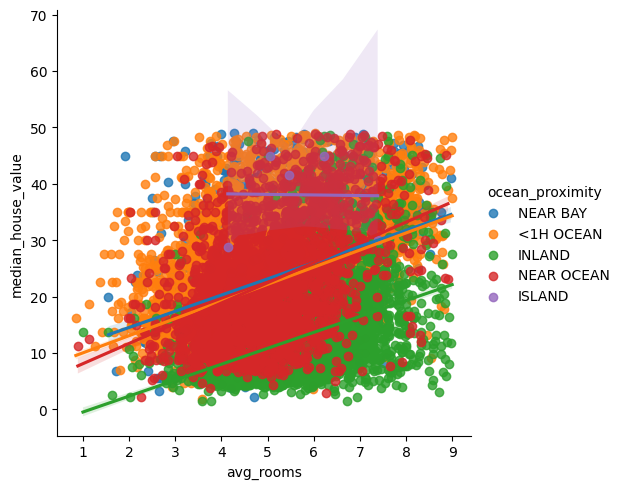

In [83]:
plt.figure(figsize=(18, 8))
sns.lmplot(data=prices, x='avg_rooms', y='median_house_value', hue='ocean_proximity')

In [85]:
prices['avg_population'] = prices['population']/prices['households']

In [86]:
# gonna drop island because very few data points for that?

prices[prices['ocean_proximity'] == 'ISLAND']

,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_bedrooms,avg_rooms,avg_population
7898,1675.0,521.0,744.0,331.0,2.1579,45.00,ISLAND,1.574018,5.060423,2.247734
7899,2359.0,591.0,1100.0,431.0,2.8333,41.47,ISLAND,1.371230,5.473318,2.552204
7900,2127.0,512.0,733.0,288.0,3.3906,30.00,ISLAND,1.777778,7.385417,2.545139
7901,996.0,264.0,341.0,160.0,2.7361,45.00,ISLAND,1.650000,6.225000,2.131250
7902,716.0,214.0,422.0,173.0,2.6042,28.75,ISLAND,1.236994,4.138728,2.439306


<Axes: xlabel='avg_population', ylabel='Count'>

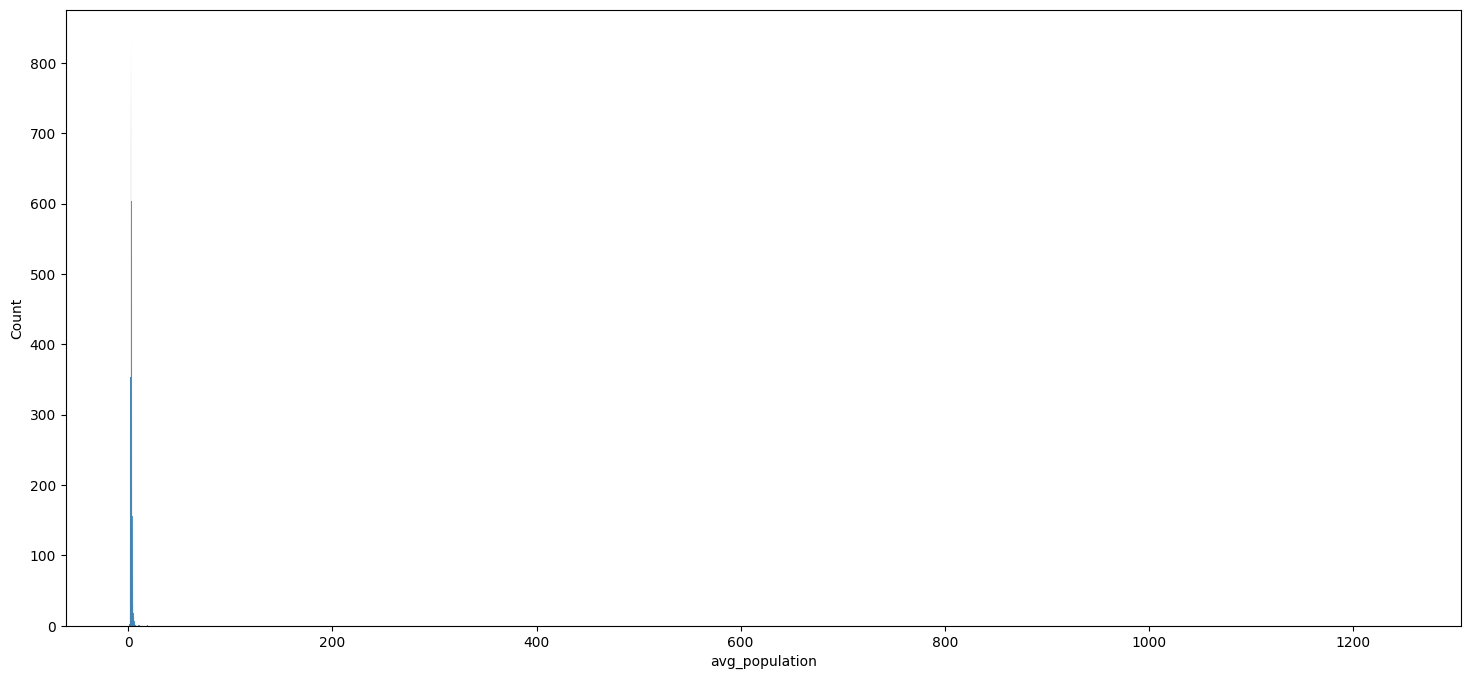

In [88]:
plt.figure(figsize=(18,8))
sns.histplot(data=prices, x='avg_population')

In [100]:
prices[prices['avg_population'] > 5].drop(columns='ocean_proximity').corr()

,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_bedrooms,avg_rooms,avg_population
total_rooms,1.000000,0.972412,0.908023,0.968370,0.017001,0.083289,-0.026253,0.094181,-0.072735
total_bedrooms,0.972412,1.000000,0.906613,0.996598,-0.052226,0.083028,-0.036600,-0.040432,-0.086881
population,0.908023,0.906613,1.000000,0.909428,0.049429,0.074226,-0.053730,0.009809,0.162119
households,0.968370,0.996598,0.909428,1.000000,-0.050414,0.071852,-0.079849,-0.072748,-0.085026
median_income,0.017001,-0.052226,0.049429,-0.050414,1.000000,0.333186,-0.093277,0.371860,0.351996
median_house_value,0.083289,0.083028,0.074226,0.071852,0.333186,1.000000,0.105656,0.176792,-0.027297
avg_bedrooms,-0.026253,-0.036600,-0.053730,-0.079849,-0.093277,0.105656,1.000000,0.480112,-0.035406
avg_rooms,0.094181,-0.040432,0.009809,-0.072748,0.371860,0.176792,0.480112,1.000000,-0.002626
avg_population,-0.072735,-0.086881,0.162119,-0.085026,0.351996,-0.027297,-0.035406,-0.002626,1.000000


In [106]:
prices.drop(columns='ocean_proximity').corr()

,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_bedrooms,avg_rooms,avg_population
total_rooms,1.000000,0.931650,0.897518,0.933607,0.228585,0.144835,0.042880,0.238056,-0.083207
total_bedrooms,0.931650,1.000000,0.915452,0.992127,0.021375,0.076378,0.107526,-0.025161,-0.131253
population,0.897518,0.915452,1.000000,0.929965,0.049547,0.013353,-0.019032,-0.011798,0.178810
households,0.933607,0.992127,0.929965,1.000000,0.046727,0.091002,0.016217,-0.040961,-0.117476
median_income,0.228585,0.021375,0.049547,0.046727,1.000000,0.646907,-0.228708,0.654279,-0.035998
median_house_value,0.144835,0.076378,0.013353,0.091002,0.646907,1.000000,-0.132150,0.256197,-0.257949
avg_bedrooms,0.042880,0.107526,-0.019032,0.016217,-0.228708,-0.132150,1.000000,0.194099,-0.113335
avg_rooms,0.238056,-0.025161,-0.011798,-0.040961,0.654279,0.256197,0.194099,1.000000,0.000886
avg_population,-0.083207,-0.131253,0.178810,-0.117476,-0.035998,-0.257949,-0.113335,0.000886,1.000000


In [104]:
prices = prices.drop(index = (prices[prices['avg_population'] > 5]).index)

In [114]:
prices

,households,median_income,median_house_value,ocean_proximity,avg_bedrooms,avg_rooms,avg_population
0,126.0,8.3252,45.26,NEAR BAY,1.023810,6.984127,2.555556
1,1138.0,8.3014,35.85,NEAR BAY,0.971880,6.238137,2.109842
2,177.0,7.2574,35.21,NEAR BAY,1.073446,8.288136,2.802260
3,219.0,5.6431,34.13,NEAR BAY,1.073059,5.817352,2.547945
4,259.0,3.8462,34.22,NEAR BAY,1.081081,6.281853,2.181467
...,...,...,...,...,...,...,...
19404,330.0,1.5603,7.81,INLAND,1.133333,5.045455,2.560606
19405,114.0,2.5568,7.71,INLAND,1.315789,6.114035,3.122807
19406,433.0,1.7000,9.23,INLAND,1.120092,5.205543,2.325635
19407,349.0,1.8672,8.47,INLAND,1.171920,5.329513,2.123209


<Axes: xlabel='avg_rooms', ylabel='Count'>

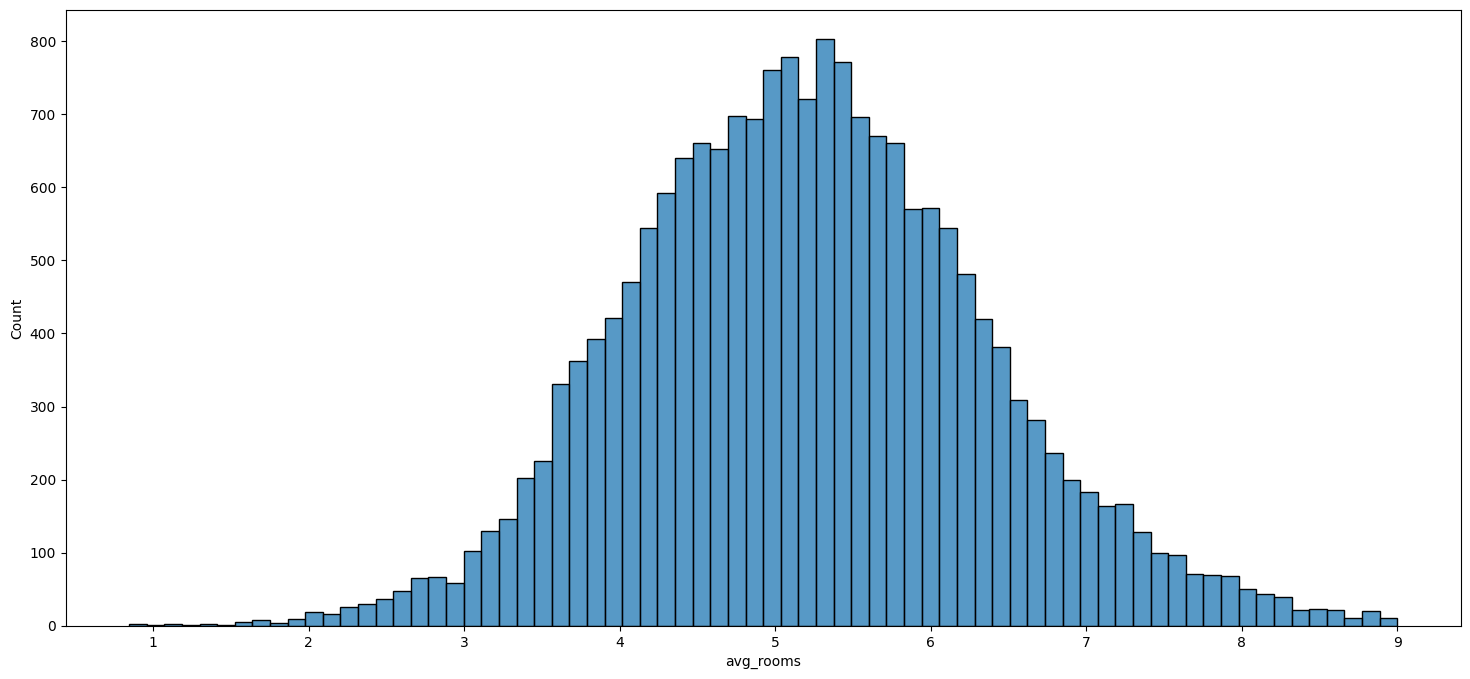

In [111]:
plt.figure(figsize=(18, 8))
sns.histplot(data=prices, x='avg_rooms')

In [116]:
# prices = prices.drop(columns=['total_rooms', 'total_bedrooms', 'population'])
prices = prices.drop(columns=['households'])

In [117]:
prices.drop(columns='ocean_proximity').corr()

,median_income,median_house_value,avg_bedrooms,avg_rooms,avg_population
median_income,1.000000,0.646907,-0.228708,0.654279,-0.035998
median_house_value,0.646907,1.000000,-0.132150,0.256197,-0.257949
avg_bedrooms,-0.228708,-0.132150,1.000000,0.194099,-0.113335
avg_rooms,0.654279,0.256197,0.194099,1.000000,0.000886
avg_population,-0.035998,-0.257949,-0.113335,0.000886,1.000000


<Figure size 1800x800 with 0 Axes>

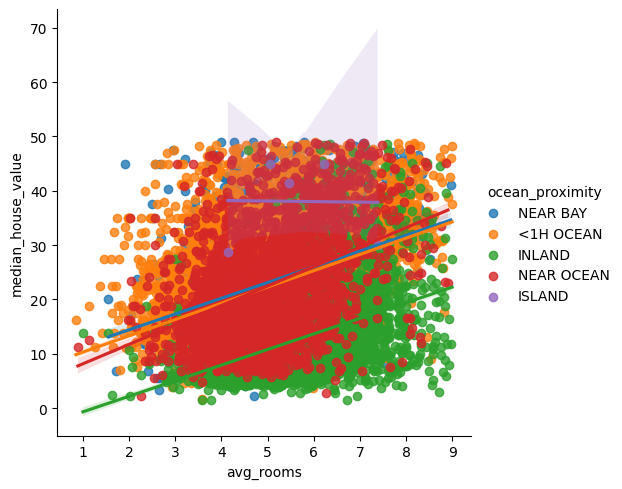

In [123]:
plt.figure(figsize=(18, 8))
sns.lmplot(data=prices, x='avg_rooms', y='median_house_value', hue='ocean_proximity')

In [1]:
prices.drop(columns='avg_bedrooms', inplace=True)
prices.to_csv('data/housing_processed1.csv', index=False)

NameError: name 'prices' is not defined